<a href="https://colab.research.google.com/github/Arnaldoeloi/discentes-ufrn-2009-2019-analise-dados/blob/master/Analise_de_Dados_Discentes_UFRN_2009_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apresentação

Autor: Arnaldo Barbosa Eloi de Souza

Neste documento exploraremos os dados coletados dos discentes da UFRN no período de 2009 a 2019 quanto ao sexo e etnia.

#1.0 Limpeza do Dataset

Aqui leremos os dados dispostos na área Discentes, nos dados abertos da UFRN.  

In [0]:
import pandas as pd

d2009 = pd.read_csv('discentes-2009.csv', sep=';')
d2010 = pd.read_csv('discentes-2010.csv', sep=';')
d2011 = pd.read_csv('discentes-2011.csv', sep=';')
d2012 = pd.read_csv('discentes-2012.csv', sep=';')
d2013 = pd.read_csv('discentes-2013.csv', sep=';')
d2014 = pd.read_csv('discentes-2014.csv', sep=';')
d2015 = pd.read_csv('discentes-2015.csv', sep=';')
d2016 = pd.read_csv('discentes-2016.csv', sep=';')
d2017 = pd.read_csv('discentes-2017.csv', sep=';')
d2018 = pd.read_csv('discentes-2018.csv', sep=';')
d2019 = pd.read_csv('discentes-2019.csv', sep=';')

discentes = pd.concat([d2009, d2010, d2011, d2012, d2013, d2014, d2015, d2016, d2017, d2018, d2019])


Queremos saber os níveis de ensino para só então remover os indesejados, portanto:

In [22]:
discentes['nivel_ensino'].value_counts()

GRADUAÇÃO                94370
TÉCNICO                  29622
MESTRADO                 23881
LATO SENSU               22331
FORMAÇÃO COMPLEMENTAR    13168
DOUTORADO                 7197
RESIDÊNCIA                1312
TÉCNICO INTEGRADO         1175
INFANTIL                   439
FUNDAMENTAL                414
MÉDIO                      151
STRICTO SENSU                1
Name: nivel_ensino, dtype: int64

Sabendo quais os nível de ensino dispostos em nosso dataset, queremos apenas os de graduação e pós graduação. Portanto, removeremos os alunos com nível técnico, infantil, fundamental, médio e técnico integrado. 

In [0]:
discentes = discentes[ (discentes['nivel_ensino'] != 'TÉCNICO') 
                      & (discentes['nivel_ensino'] != 'INFANTIL') 
                      & (discentes['nivel_ensino'] != 'FUNDAMENTAL') 
                      & (discentes['nivel_ensino'] != 'MÉDIO') 
                      & (discentes['nivel_ensino'] != 'TÉCNICO INTEGRADO') ] 

In [32]:
discentes.head(2)

,matricula,nome_discente,sexo,raca,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,2.009022e+09,Abdias Beserra Pereira Júnior,M,Pardo,2009,1.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,111635057.0,HISTÓRIA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1,2.009116e+09,ABDO FARRET NETO,M,Não Informado,2009,2.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,D,DOUTORADO,9300591.0,DOUTORADO EM DESENVOLVIMENTO E INOVAÇÃO TECNOL...,PRESENCIAL,4847.0,PROGRAMA DE PÓS-GRADUAÇÃO EM DESENVOLVIMENTO E...,441.0,CENTRO DE CIÊNCIAS DA SAÚDE


##1.1 Planejamento de visualização dos dados


Os centros de cursos da UFRN são os dispostos na coluna 'nome_unidade_gestora'. Abaixo, a quantidade de estudantes associados a cada centro:

In [34]:
discentes['nome_unidade_gestora'].value_counts()

CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES     33702
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE    28969
CENTRO DE CIÊNCIAS DA SAÚDE                    18340
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS           17341
CENTRO DE CIÊNCIAS EXATAS E DA TERRA           13050
CENTRO DE TECNOLOGIA                           12308
CENTRO DE  ENSINO SUPERIOR DO SERIDÓ            8568
CENTRO DE EDUCAÇÃO                              7267
CENTRO DE BIOCIÊNCIAS                           7033
HOSPITAL UNIVERSITÁRIO ONOFRE LOPES              440
HOSPITAL UNIVERSITARIO ANA BEZERRA               213
MATERNIDADE ESCOLA JANUÁRIO CICCO                190
HOSPED - HOSPITAL DE PEDIATRIA                   185
Name: nome_unidade_gestora, dtype: int64

Utilizaremos também a coluna *sexo* e *raca* para gerar os gráficos atravé dos anos.

In [36]:
discentes['raca'].value_counts()

Branco                          63812
Pardo                           57737
Não Informado                   30899
Negro                            8970
Indígeno                          418
Amarelo (de origem oriental)      373
Remanescente de quilombo           51
Name: raca, dtype: int64

In [37]:
discentes['sexo'].value_counts()

F    81827
M    80391
N       42
Name: sexo, dtype: int64

#2.0 Visualização dos dados

Utilizaremos a Seaborn do Python para visualizar alguns dados. Primeiro, vejamos o crescimento na ingressão de pessoas por sexo e etnia em toda a UFRN através dos anos.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

## 2.1 Ingressão por sexo e etnia em toda a UFRN

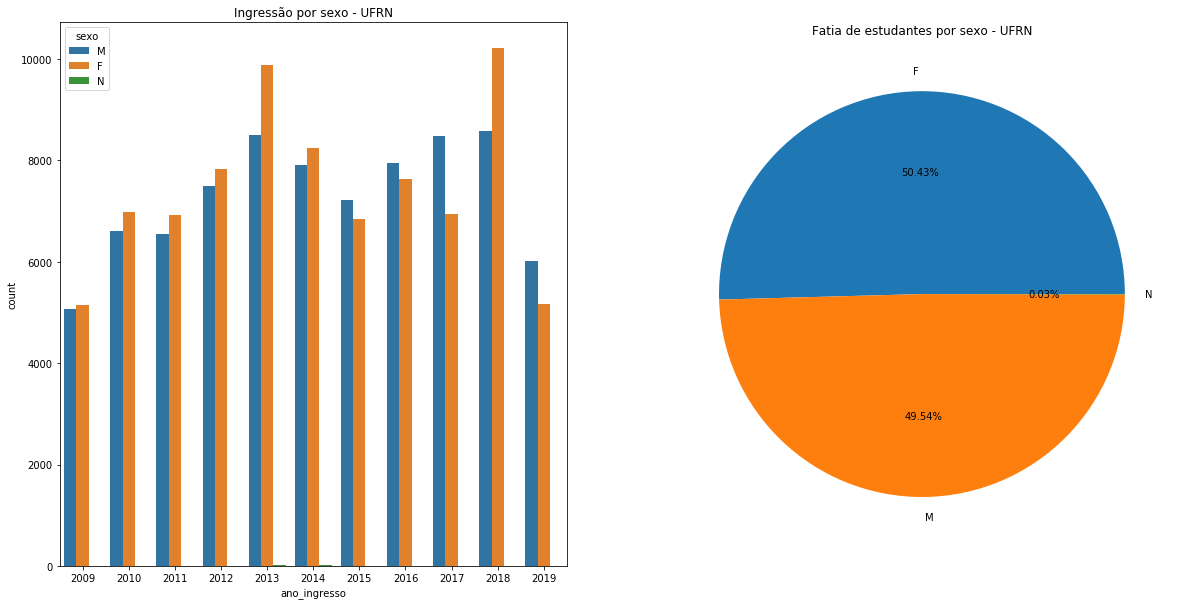

In [90]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=discentes).set_title("Ingressão por sexo - UFRN" )
plt.subplot(1,2,2)
discentes['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo - UFRN")

Podemos concluir com os gráficos que a ingressão de homens e mulheres na UFRN é bastante equilibrada (quase 50-50).

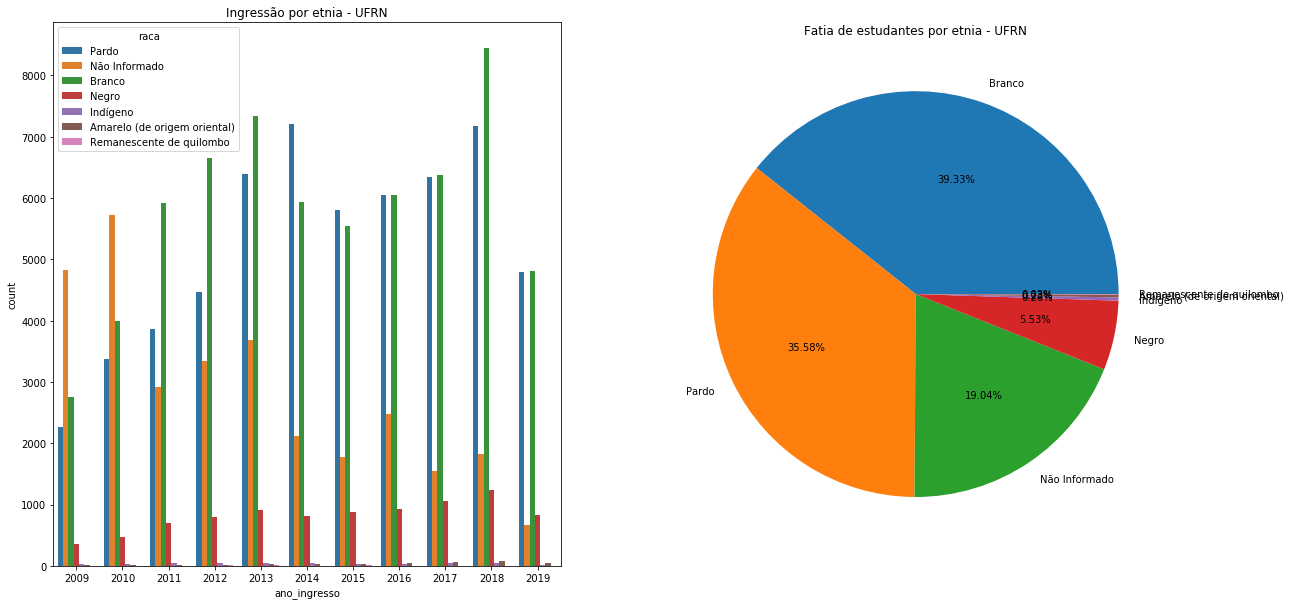

In [91]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(x="ano_ingresso", hue='raca', data=discentes).set_title("Ingressão por etnia - UFRN" )
plt.subplot(1,2,2)
discentes['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia - UFRN")

Aqui, podemos perceber que as etnias Branco e Pardo ocupam a maioria das vagas da Universidade, respectivamente 39.33% e 35.58%. Embora na maioria dos anos o ingresso de brancos foi superior ao de pardos, ambos, com poucas exceções, permaneceram equilibrados nos 10 anos analisados. O fato curioso do gráfico de barras é a quantidade de ingressantes com raça/etnia não informada nos anos 2009 e 2010. Tal fato pode estar atrelado a mudanças de requisitos no momento da matrícula ou até como esses dados eram tratados na época.  

##2.2 Separação por centros de ensino

Separaremos aqui os datasets por centro para então analisarmos curso por curso.

---



In [92]:
discentes['nome_unidade_gestora'].value_counts()

CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES     33702
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE    28969
CENTRO DE CIÊNCIAS DA SAÚDE                    18340
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS           17341
CENTRO DE CIÊNCIAS EXATAS E DA TERRA           13050
CENTRO DE TECNOLOGIA                           12308
CENTRO DE  ENSINO SUPERIOR DO SERIDÓ            8568
CENTRO DE EDUCAÇÃO                              7267
CENTRO DE BIOCIÊNCIAS                           7033
HOSPITAL UNIVERSITÁRIO ONOFRE LOPES              440
HOSPITAL UNIVERSITARIO ANA BEZERRA               213
MATERNIDADE ESCOLA JANUÁRIO CICCO                190
HOSPED - HOSPITAL DE PEDIATRIA                   185
Name: nome_unidade_gestora, dtype: int64

In [0]:
#ciencias humanas, letras e artes
chla = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES' ]

#centro de ciências da saude
ccs = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE CIÊNCIAS DA SAÚDE' ]

#centro de ciencias sociais aplicadas
ccsa = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS' ]

#centro de ciencias exatas e da terra
ccet = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA' ]

#centro de tecnologia
ct = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE TECNOLOGIA' ]

#centro de ensino superior do Seridó
cess = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE  ENSINO SUPERIOR DO SERIDÓ' ]

#centro de educação
cde = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE EDUCAÇÃO' ]

#centro de biociências
cdb = discentes[discentes['nome_unidade_gestora'] == 'CENTRO DE BIOCIÊNCIAS' ]

#ufrn
ufrn = discentes[discentes['nome_unidade_gestora'] == 'UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE' ]

## 2.3 Análise por diferente centros
Para analisarmos as diferenças de ingresso por sexo e etnia nos cursos devemos utilizar áreas diferentes (ex: humanas e exatas) afim de verificar reais diferenças nos dados. Vamos comparar cursos de ciências humanas com cursos de tecnologia.

### 2.3.1 Centro de Ciências Humanas, letras e artes 

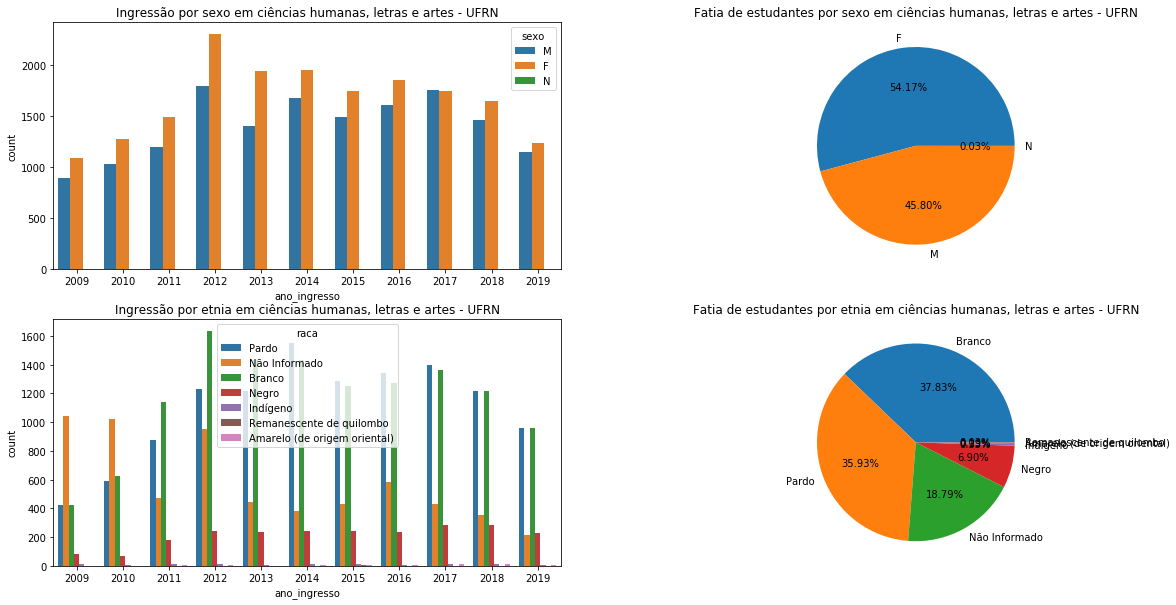

In [118]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=chla).set_title("Ingressão por sexo em ciências humanas, letras e artes - UFRN" )
plt.subplot(2,2,2)
chla['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em ciências humanas, letras e artes - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=chla).set_title("Ingressão por etnia em ciências humanas, letras e artes - UFRN" )
plt.subplot(2,2,4)
chla['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em ciências humanas, letras e artes - UFRN")

Notamos que no centro de ciências humanas, letras e artes o padrão geral da universidade é seguido para etnia, onde brancos e pardos correspondem à maioria. No entanto, podemos perceber que a fatia de mulheres nos cursos desse centro é maior que no padrão da Universidade. Mas o que podemos concluir pelos 5 cursos mais populares desse centro?

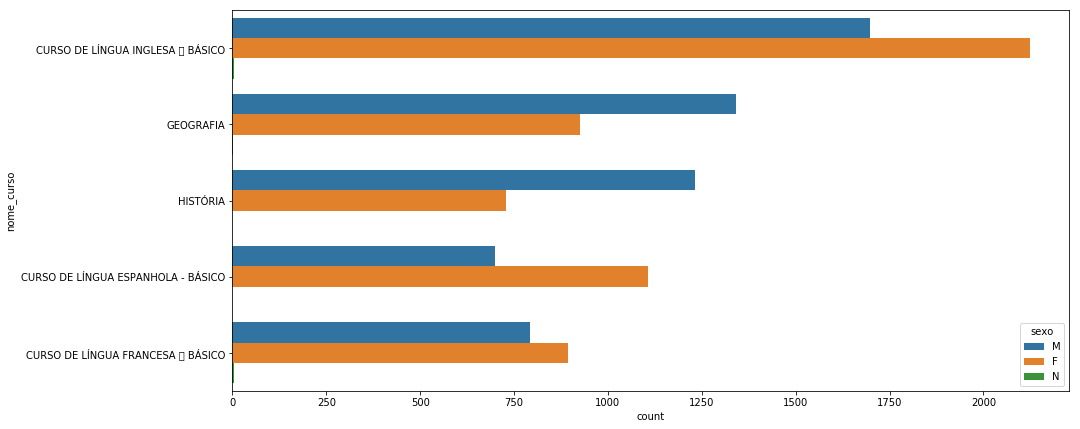

In [128]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=chla, order= chla['nome_curso'].value_counts().iloc[:5].index)

O curso de língua inglesa possuiu maior ingressão de mulheres que homens nos 10 anos analisados. Agora aos cursos do Centro de Tecnologia:

### 2.3.2 Centro de Tecnologia

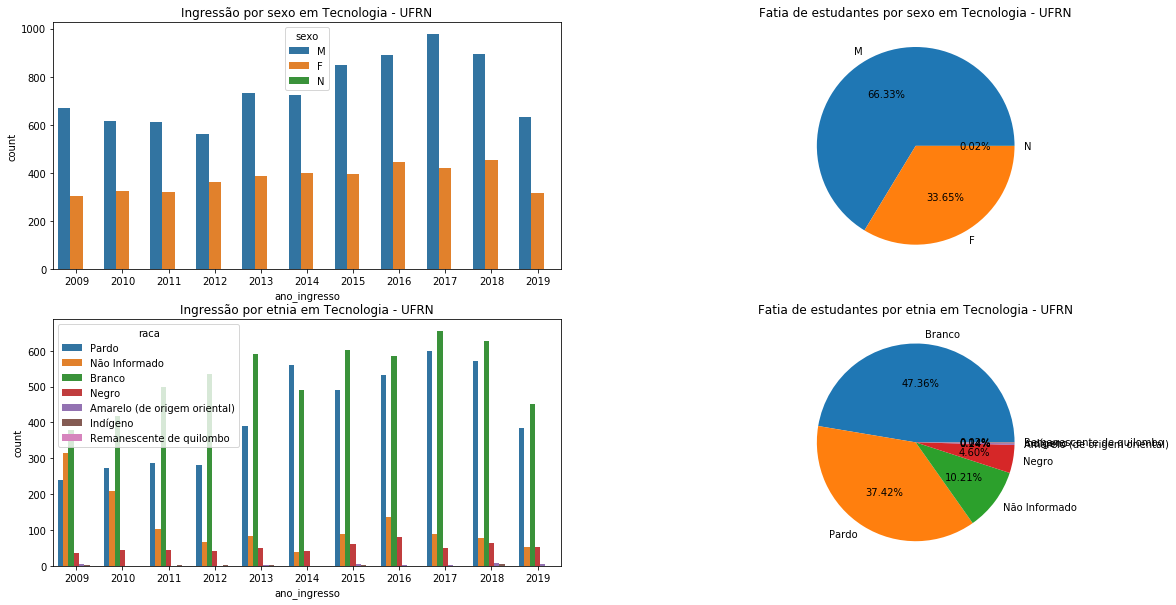

In [129]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=ct).set_title("Ingressão por sexo em Tecnologia - UFRN" )
plt.subplot(2,2,2)
ct['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em Tecnologia - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=ct).set_title("Ingressão por etnia em Tecnologia - UFRN" )
plt.subplot(2,2,4)
ct['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em Tecnologia - UFRN")

O número de homens, assim como é amplamente divulgado nas mídias, representa 2/3 do número total dos cursos de Tecnologia. A maioria nos cursos de tecnologia é branca (47,36%), mais de 10% a mais que a parda (37,42%). Veremos os 5 cursos mais populares desse setor quanto ao sexo.

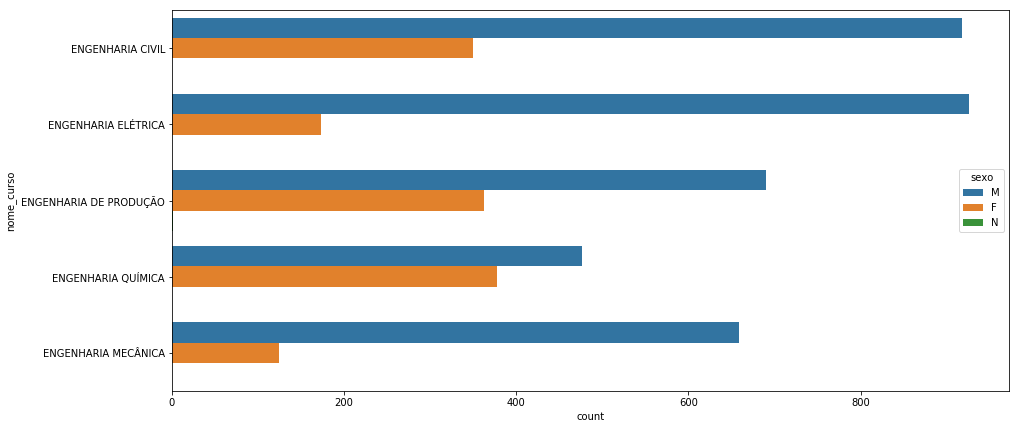

In [130]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=ct, order= ct['nome_curso'].value_counts().iloc[:5].index)

O curso mais equilibrado entre ambos os sexos é Engenharia Química, mas ainda possui a maioria das vagas preenchida por homens.

### 2.3.3 Centro de Ciências da Saúde

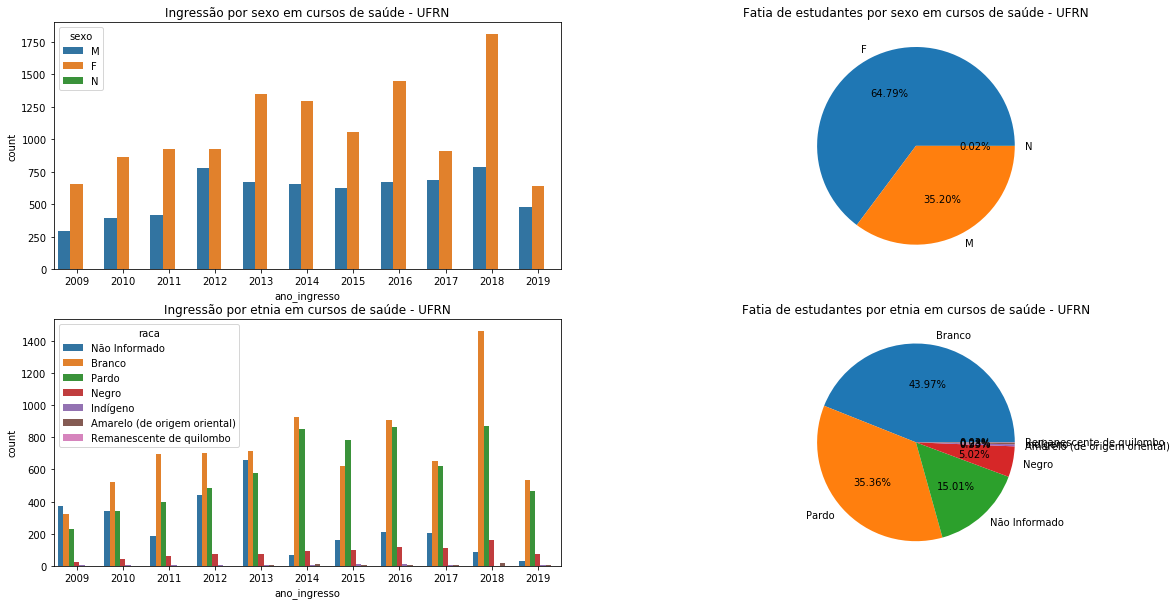

In [134]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=ccs).set_title("Ingressão por sexo em cursos de saúde - UFRN" )
plt.subplot(2,2,2)
ccs['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em cursos de saúde - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=ccs).set_title("Ingressão por etnia em cursos de saúde - UFRN" )
plt.subplot(2,2,4)
ccs['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em cursos de saúde - UFRN")

Para o setor da saúde exatamente ocorre exatamente o contrário ao que ocorre no setor de tecnologia. A maioria dos discentes cadastrados nesse setor são do sexo feminino. Ainda assim, os discentes da cor branca ainda representam a maioria, como no padrão do restante da universidade e dos outros cursos analisados até o momento. Veremos agora quais os 5 cursos mais populares que representam esse crescimento para as estudantes do sexo feminino.

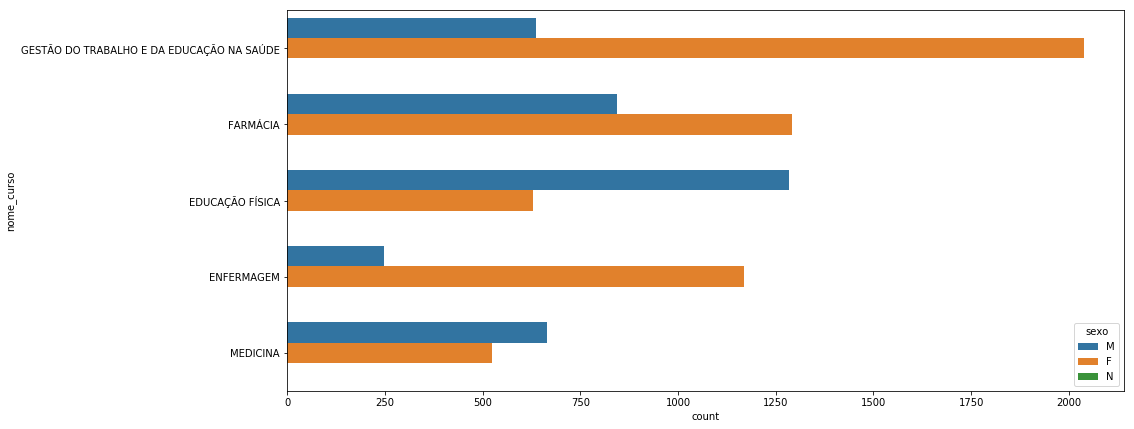

In [133]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=ccs, order= ccs['nome_curso'].value_counts().iloc[:5].index)

Percebemos que os cursos de peso para o lado feminino são Gestão do Trabalho e da Educação na Saúde, Farmácia e Enfermagem. A exceção principal no setor com relação ao sexo é o curso de educação física, onde os homens representam a maioria.

### 2.3.4  Centro de Ciências Exatas e da Terra

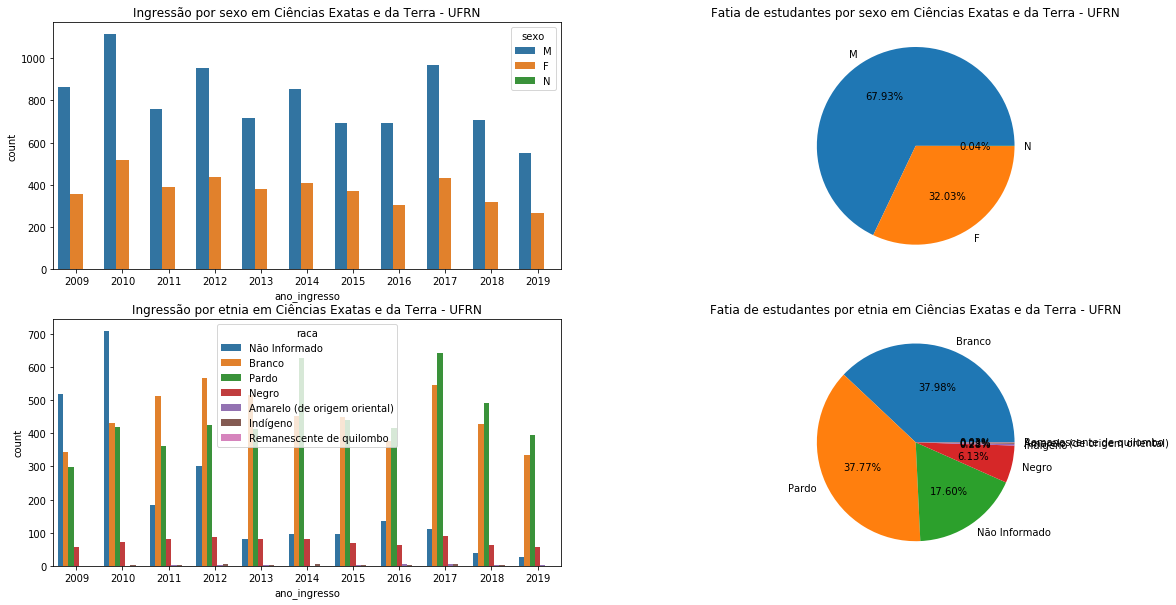

In [136]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=ccet).set_title("Ingressão por sexo em Ciências Exatas e da Terra - UFRN" )
plt.subplot(2,2,2)
ccet['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em Ciências Exatas e da Terra - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=ccet).set_title("Ingressão por etnia em Ciências Exatas e da Terra - UFRN" )
plt.subplot(2,2,4)
ccet['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em Ciências Exatas e da Terra - UFRN")

Aqui vemos um equilíbrio entre estudantes pardos e brancos, mas uma maioria de estudantes masculinos (67.93% contra 32.03% femininos). Veremos, nos 5 cursos mais populares quais cursos elevam esse desequlíbrio para o lado masculino.

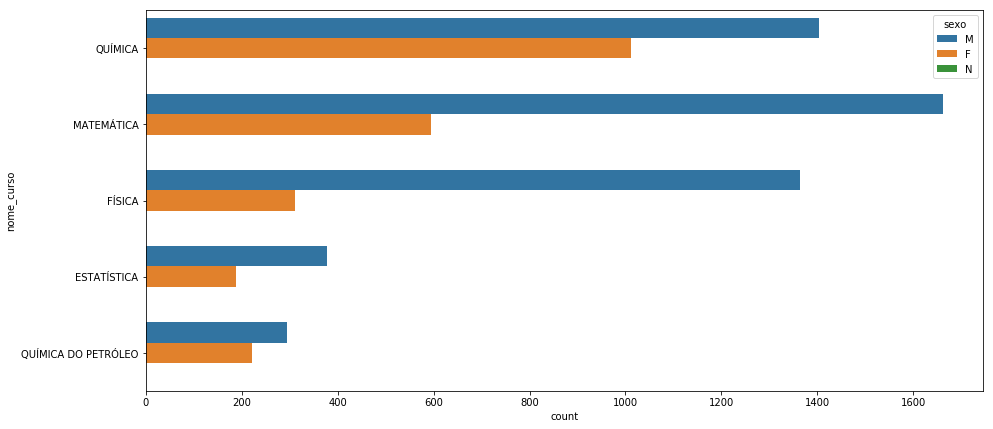

In [137]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=ccet, order= ccet['nome_curso'].value_counts().iloc[:5].index)

Todos os cursos possuem a maioria pendente para o lado masculino, no entanto, a maior disparidade ocorre nos cursos de física e matemática. Os dados parecem sugerir os estudantes do sexo masculino, em geral, preferem as ciências exatas às áreas da saúde, oposto às mulheres.  

### 2.3.5 Centro de Ciências Sociais Aplicadas

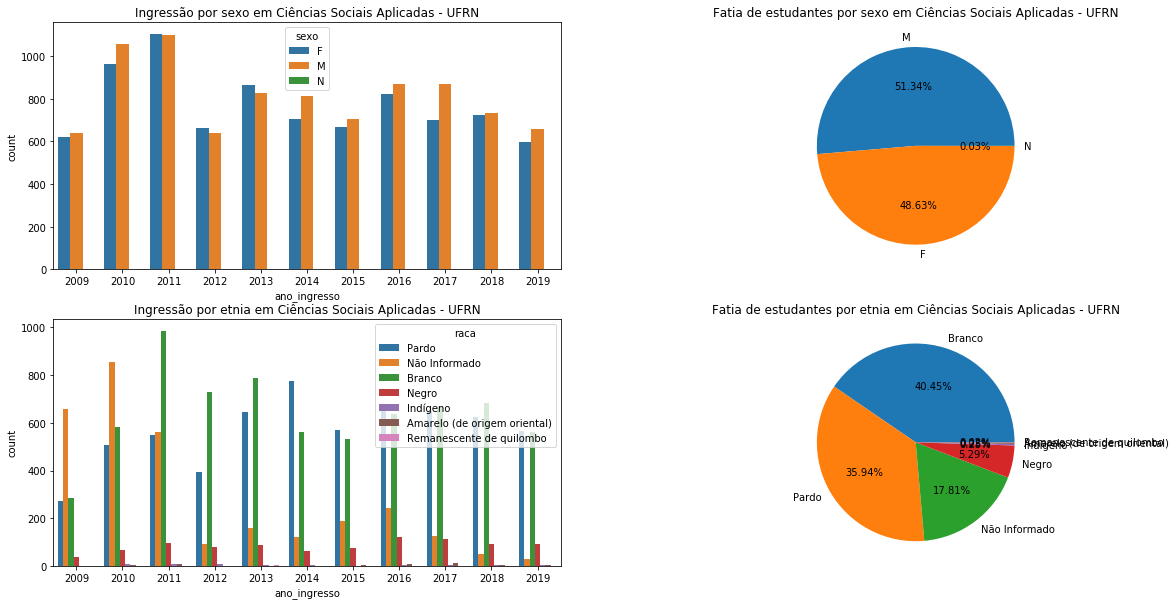

In [138]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=ccsa).set_title("Ingressão por sexo em Ciências Sociais Aplicadas - UFRN" )
plt.subplot(2,2,2)
ccsa['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em Ciências Sociais Aplicadas - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=ccsa).set_title("Ingressão por etnia em Ciências Sociais Aplicadas - UFRN" )
plt.subplot(2,2,4)
ccsa['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em Ciências Sociais Aplicadas - UFRN")

Curiosamente, os cursos de Ciências Sociais Aplicadas apresentam um equilíbrio entre os sexos. No entanto, a maioria dos inscritos continuam sendo brancos (40.45%) e pardos (35.94%). Percebos em Ciências Sociais Aplicadas o mesmo padrão geral da UFRN. Veremos agora com relação aos cursos deste centro.

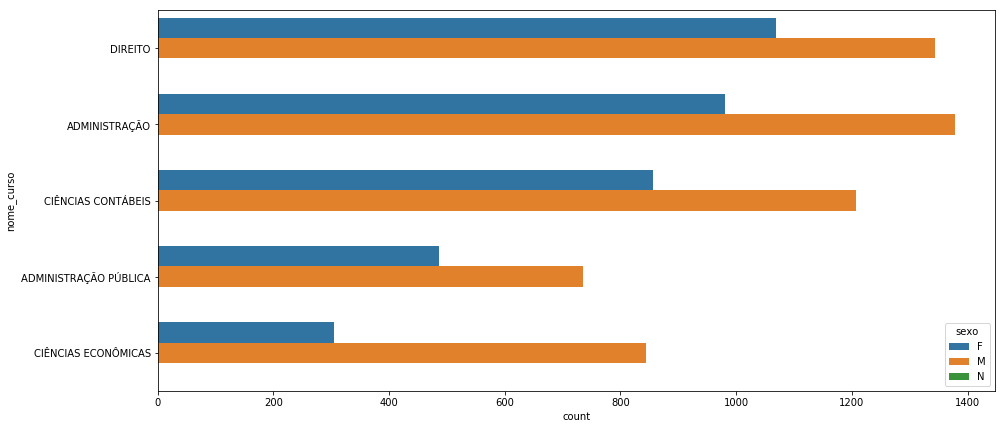

In [140]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=ccsa, order= ccsa['nome_curso'].value_counts().iloc[:5].index)

Nos cursos, os homens representam a maioria em todos os cursos, mas com um gap pequeno. O maior gap entre a quantidade de homens e mulheres ocorre em ciências econômicas, o que nos leva a questionar novamente o porquê dos dados mostrarem uma tendência maior de escolha dos homens às exatas.

### 2.3.6 Centro de Educação

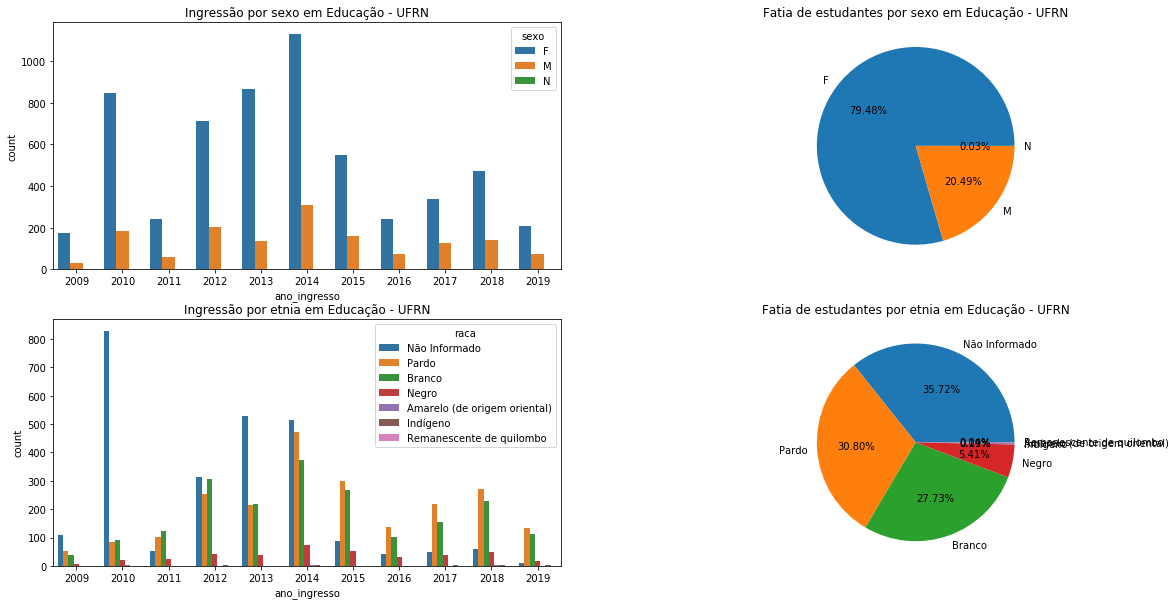

In [142]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=cde).set_title("Ingressão por sexo em Educação - UFRN" )
plt.subplot(2,2,2)
cde['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em Educação - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=cde).set_title("Ingressão por etnia em Educação - UFRN" )
plt.subplot(2,2,4)
cde['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em Educação - UFRN")

Aqui os dados mostram uma maoioria expressiva de discentes do sexo feminino. A maioria das etnias é equilibrada entre pardos, brancos e não informados. Os homens não parecem expressar o mesmo interesse para as àreas educacionais que as mulheres. Veremos agora se os dados se repetem para os 5 cursos mais populares.

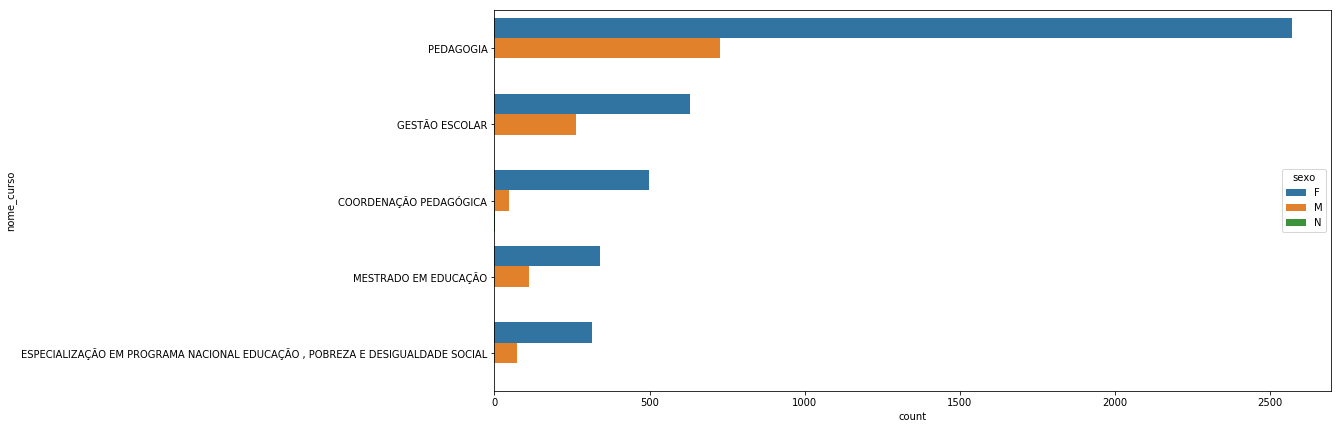

In [143]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=cde, order= cde['nome_curso'].value_counts().iloc[:5].index)

A maioria dos discentes em todos os cursos deste setor é do sexo feminino. 

### 2.3.7 Centro de Biociências

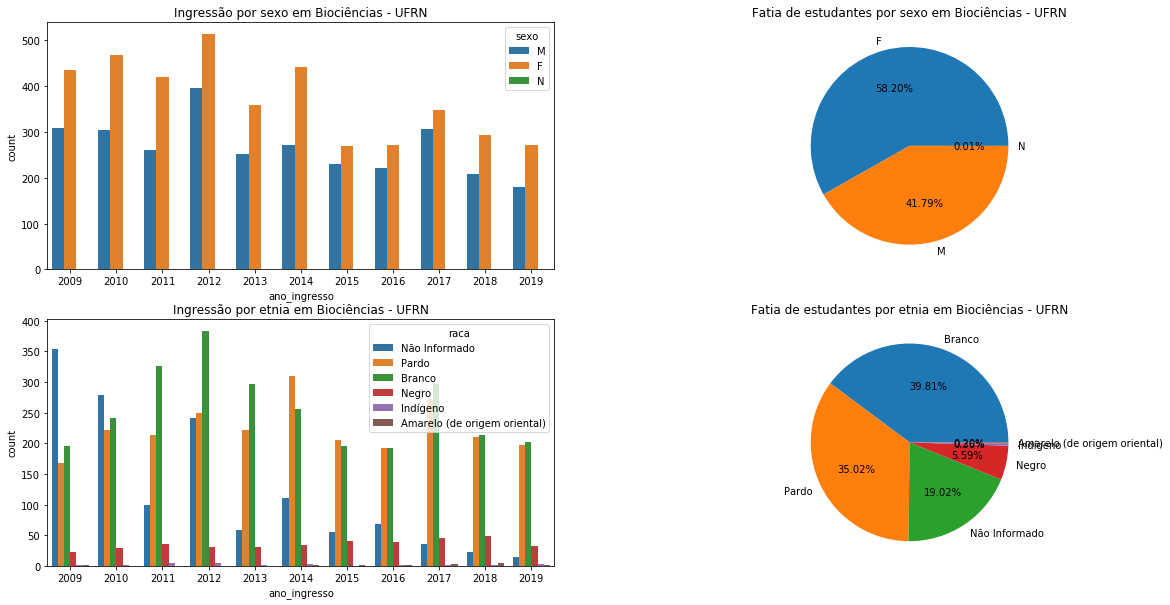

In [144]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=cdb).set_title("Ingressão por sexo em Biociências - UFRN" )
plt.subplot(2,2,2)
cdb['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em Biociências - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=cdb).set_title("Ingressão por etnia em Biociências - UFRN" )
plt.subplot(2,2,4)
cdb['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em Biociências - UFRN")

Em biociências as mulheres representam quase 10% a mais que os homens e representam a maioria de ingressantes no setor. No entanto, podemos afirmar que a disparidade não é alarmante como nos casos de Tecnologia e de Educação. Os discentes brancos e pardos representam novamente a maioria das vagas, onde 39.81% são brancos e 35.02% são pardos. Veremos agora com relação ao sexo nos cursos do setor de Biociências.

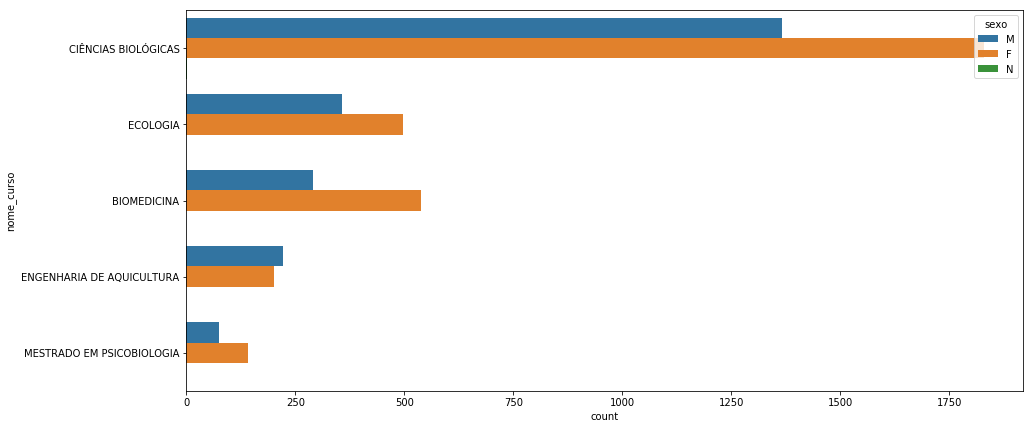

In [146]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=cdb, order= cdb['nome_curso'].value_counts().iloc[:5].index)

A maioria dos cursos apresenta uma maioria de discentes do sexo feminino, mas com um gap pequeno. A exceção é, no entanto, o curso de ciências biológicas, que possui uma distância visível entre o número de mulheres e homens e é o curso mais popular.

### 2.3.8 Centro de Ensino Superior do Seridó

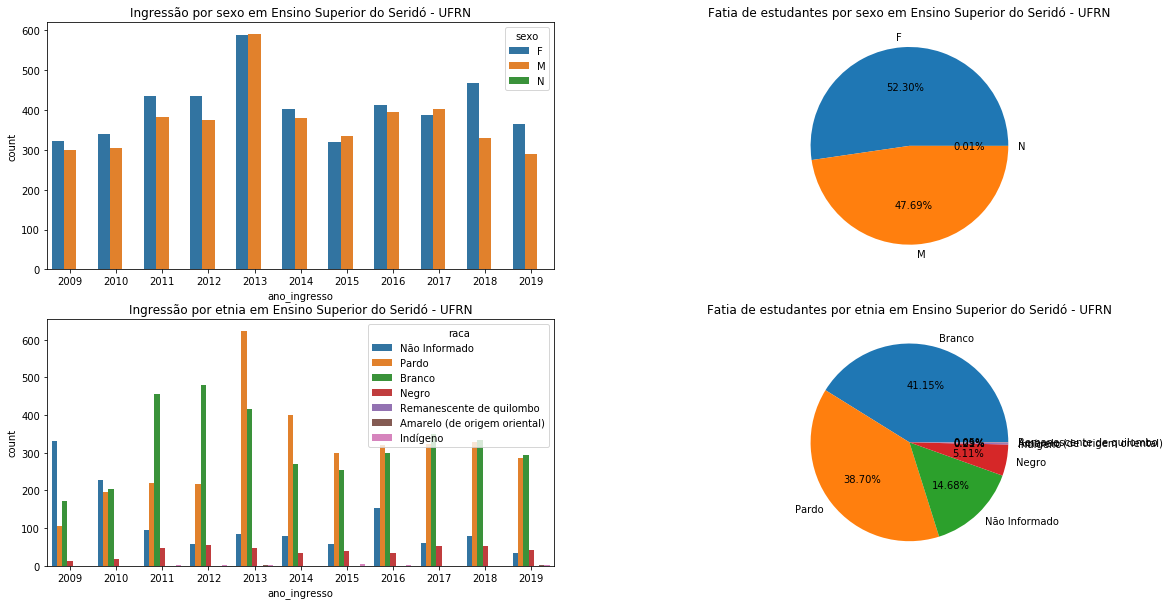

In [149]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=cess).set_title("Ingressão por sexo em Ensino Superior do Seridó - UFRN" )
plt.subplot(2,2,2)
cess['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em Ensino Superior do Seridó - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=cess).set_title("Ingressão por etnia em Ensino Superior do Seridó - UFRN" )
plt.subplot(2,2,4)
cess['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em Ensino Superior do Seridó - UFRN")

Percebemos o mesmo padrão geral da UFRN, tanto na questão dos sexos quanto na questão da etnia: homens e mulheres dividem praticamente metade das vagas; brancos e pardos representam a maioria dos matriculados. Veremos agora nos 5 principais cursos do Ensino Superior do Seridó

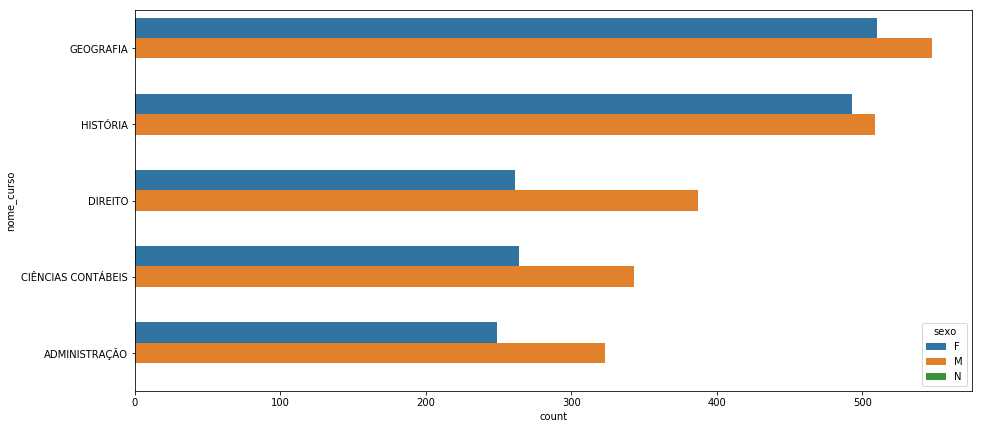

In [150]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=cess, order= cess['nome_curso'].value_counts().iloc[:5].index)

Em todos os cursos os homens representam a maioria dos discentes matriculados, mas o gap não é grande com relação aos discentes do sexo feminino.

### 2.3.9 Bacharelado em Tecnologia da Informação e Bacharelado em Ciências e Tecnologia

In [0]:
bti = discentes[discentes['nome_curso'] == 'TECNOLOGIA DA INFORMAÇÃO']
cet = discentes[discentes['nome_curso'] == 'CIÊNCIAS E TECNOLOGIA']

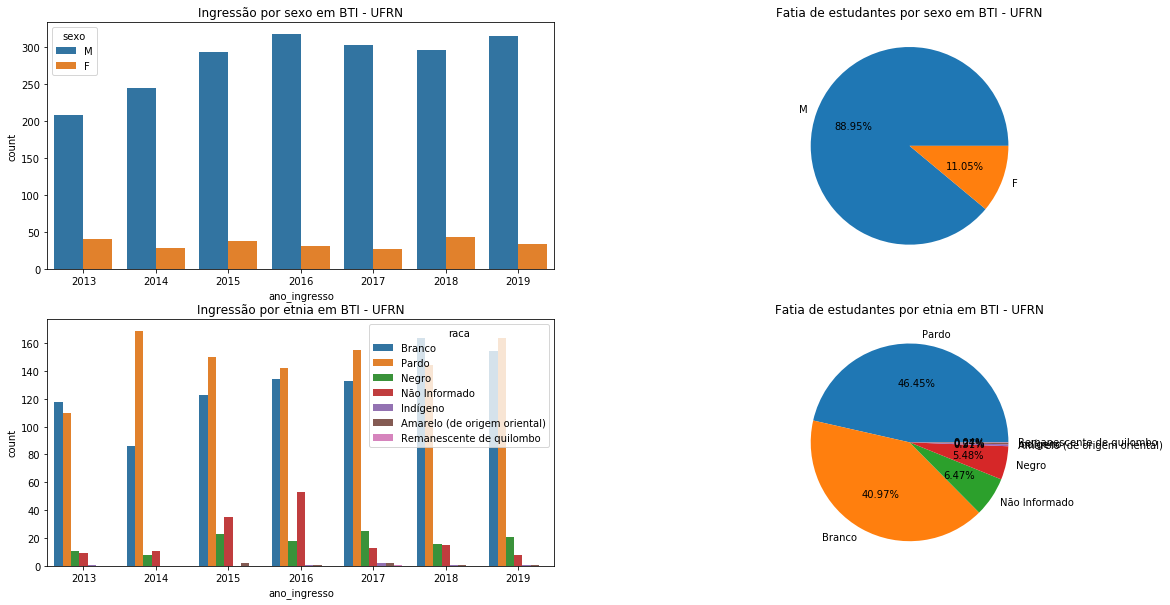

In [156]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=bti).set_title("Ingressão por sexo em BTI - UFRN" )
plt.subplot(2,2,2)
bti['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em BTI - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=bti).set_title("Ingressão por etnia em BTI - UFRN" )
plt.subplot(2,2,4)
bti['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em BTI - UFRN")

Em **Bacharelado em Tecnologia da Informação** há uma disparidade preocupante entre o número de ingressantes do sexo feminino e masculino. Quase 90% dos inscritos nos últimos 10 anos eram do sexo masculino. Tal gap é bem diferente do restante da UFRN e demonstra desinteresse das mulheres pelo curso. No entanto, as vagas estão equilibradas entre brancos(40,97%) e pardos(46,45%).

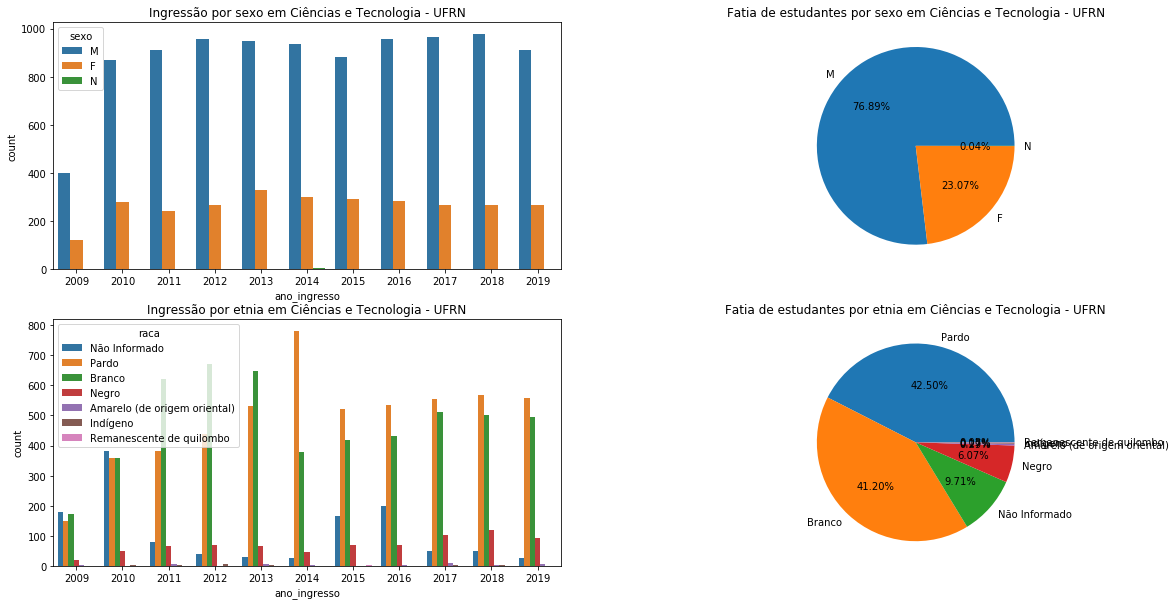

In [158]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=cet).set_title("Ingressão por sexo em Ciências e Tecnologia - UFRN" )
plt.subplot(2,2,2)
cet['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em Ciências e Tecnologia - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=cet).set_title("Ingressão por etnia em Ciências e Tecnologia - UFRN" )
plt.subplot(2,2,4)
cet['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em Ciências e Tecnologia - UFRN")

A maioria dos discentes do curso de CeT são do sexo masculino. Embora o gap seja um pouco inferior ao do curso de BTI, os dados preocupam por demonstrar desinteresse das mulheres pelo curso. As raças pardas e brancas ocupam a maioria do curso com, respectivamente, 41.20% e 42.50%, seguindo o padrão étnico da UFRN. 

## 2.4 Análise por Programa de Pós Graduação

Primeiro separaremos os datasets por programa. Os selecionados para análise foram os programas de pós graduação PPgEEC, PPgSC, PPgSW, PPgITE, PPgBIOINF.

In [173]:
search = 'PROGRAMA DE PÓS-GRADUAÇÃO'
pp = discentes[discentes['nome_unidade'].str.startswith(search, na=False)]
pp['nome_unidade'].values

array(['PROGRAMA DE PÓS-GRADUAÇÃO EM DESENVOLVIMENTO E INOVAÇÃO TECNOLÓGICA EM MEDICAMENTOS',
       'PROGRAMA DE PÓS-GRADUAÇÃO EM ARTES CÊNICAS',
       'PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS DA SAÚDE', ...,
       'PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO',
       'PROGRAMA DE PÓS-GRADUAÇÃO EM DIREITO',
       'PROGRAMA DE PÓS-GRADUAÇÃO EM EDUCAÇÃO'], dtype=object)

In [0]:
# PPgEEC    = PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DA COMPUTAÇÃO
PPgEEC = pp[pp['nome_unidade'] == 'PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA E DE COMPUTAÇÃO']

# PPgSC     = PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMAS E COMPUTAÇÃO
PPgSC = pp[pp['nome_unidade'] == 'PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMAS E COMPUTAÇÃO']

# PPgSW     = PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SOFTWARE
PPgSW = pp[pp['nome_unidade'] == 'PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SOFTWARE']

# PPgITE    = PROGRAMA DE PÓS-GRADUAÇÃO EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS
PPgITE = pp[pp['nome_unidade'] == 'PROGRAMA DE PÓS-GRADUAÇÃO EM INOVAÇÃO EM TECNOLOGIAS EDUCACIONAIS']

# PPgBIOINF = PROGRAMA DE PÓS-GRADUAÇÃO EM BIOINFORMÁTICA
PPgBIOINF = pp[pp['nome_unidade'] == 'PROGRAMA DE PÓS-GRADUAÇÃO EM BIOINFORMÁTICA']

### 2.4.1 PPgEEC

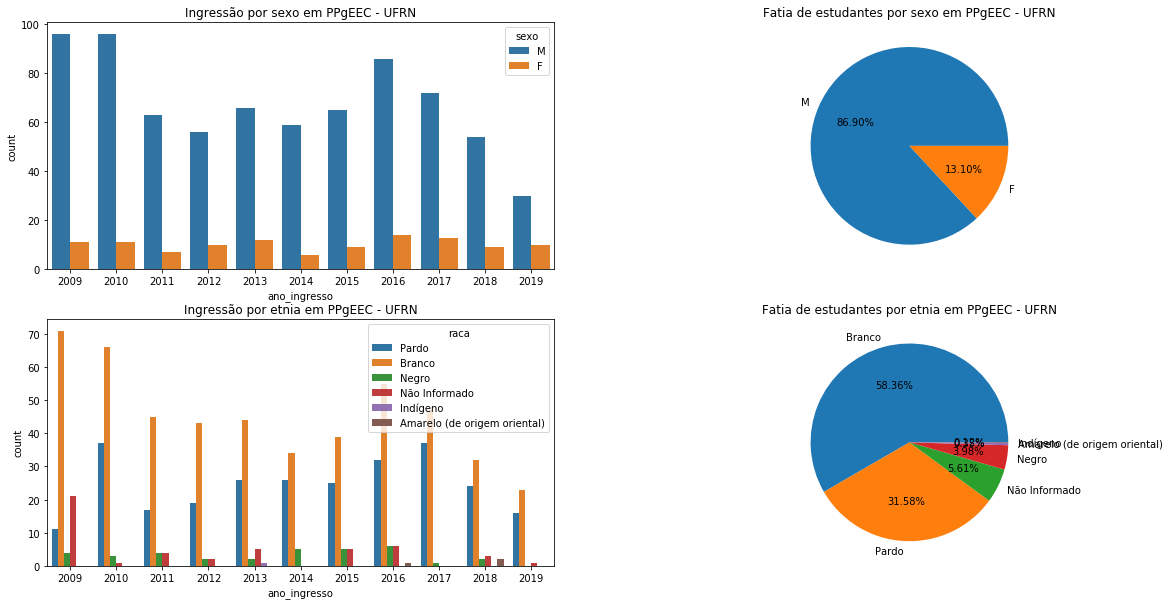

In [187]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=PPgEEC).set_title("Ingressão por sexo em PPgEEC - UFRN" )
plt.subplot(2,2,2)
PPgEEC['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em PPgEEC - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=PPgEEC).set_title("Ingressão por etnia em PPgEEC - UFRN" )
plt.subplot(2,2,4)
PPgEEC['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em PPgEEC - UFRN")

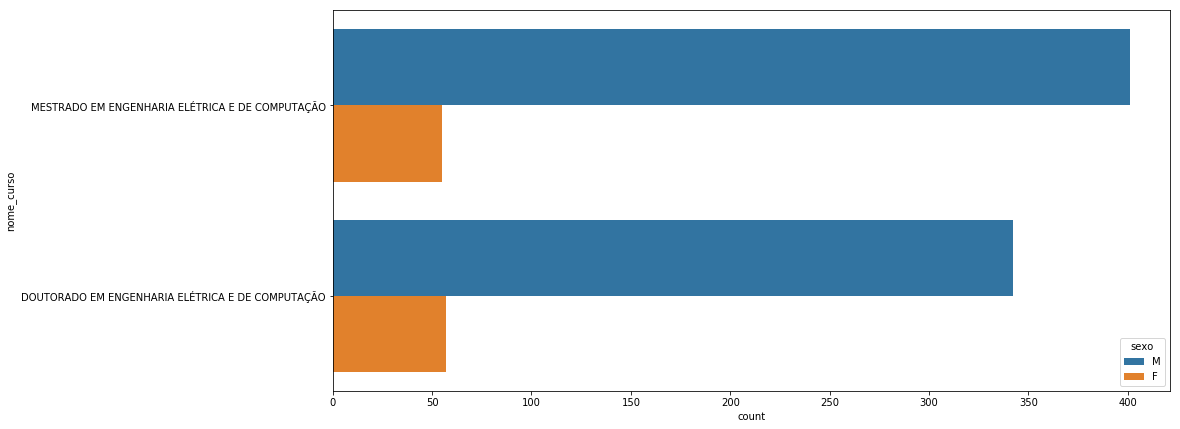

In [189]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=PPgEEC, order= PPgEEC['nome_curso'].value_counts().iloc[:5].index)

### 2.4.2 PPgSC

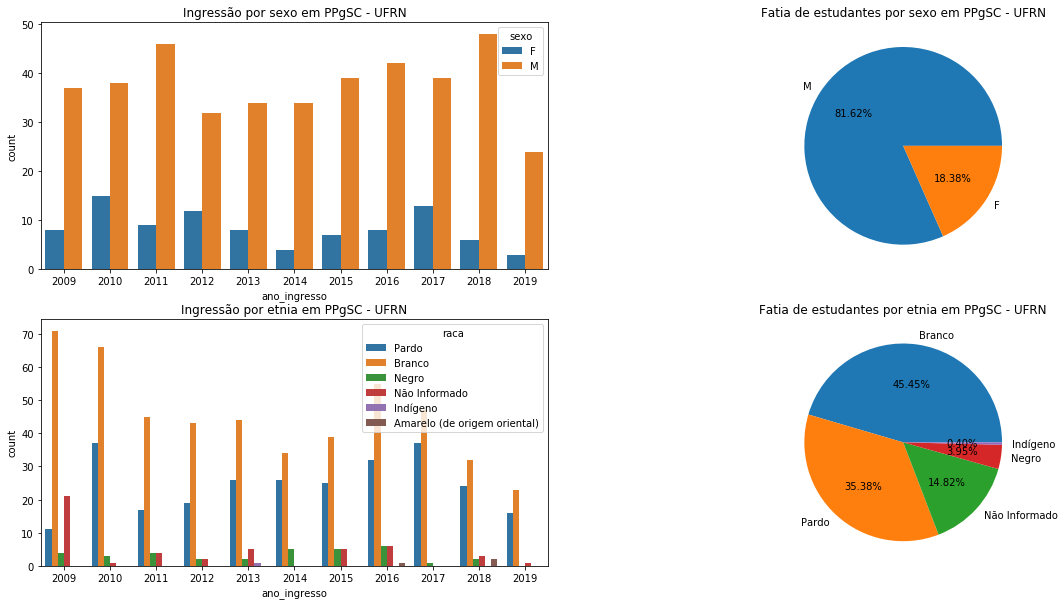

In [190]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=PPgSC).set_title("Ingressão por sexo em PPgSC - UFRN" )
plt.subplot(2,2,2)
PPgSC['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em PPgSC - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=PPgEEC).set_title("Ingressão por etnia em PPgSC - UFRN" )
plt.subplot(2,2,4)
PPgSC['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em PPgSC - UFRN")

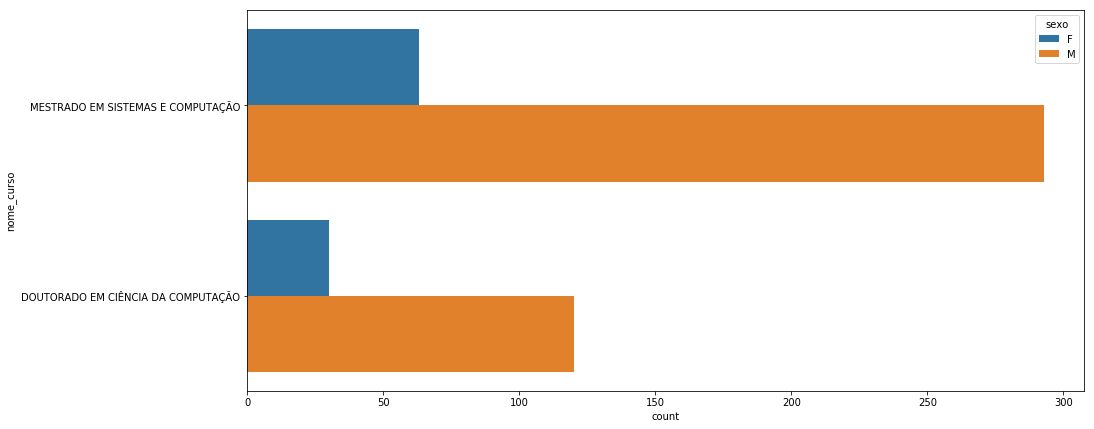

In [191]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=PPgSC, order= PPgSC['nome_curso'].value_counts().iloc[:5].index)

### 2.4.3 PPgSW

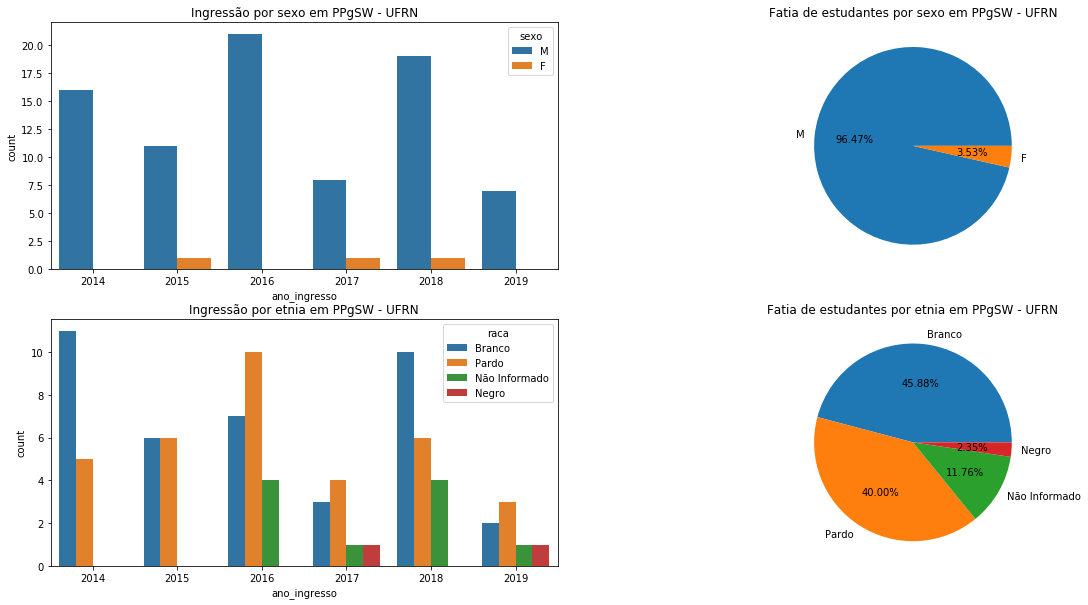

In [192]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=PPgSW).set_title("Ingressão por sexo em PPgSW - UFRN" )
plt.subplot(2,2,2)
PPgSW['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em PPgSW - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=PPgSW).set_title("Ingressão por etnia em PPgSW - UFRN" )
plt.subplot(2,2,4)
PPgSW['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em PPgSW - UFRN")

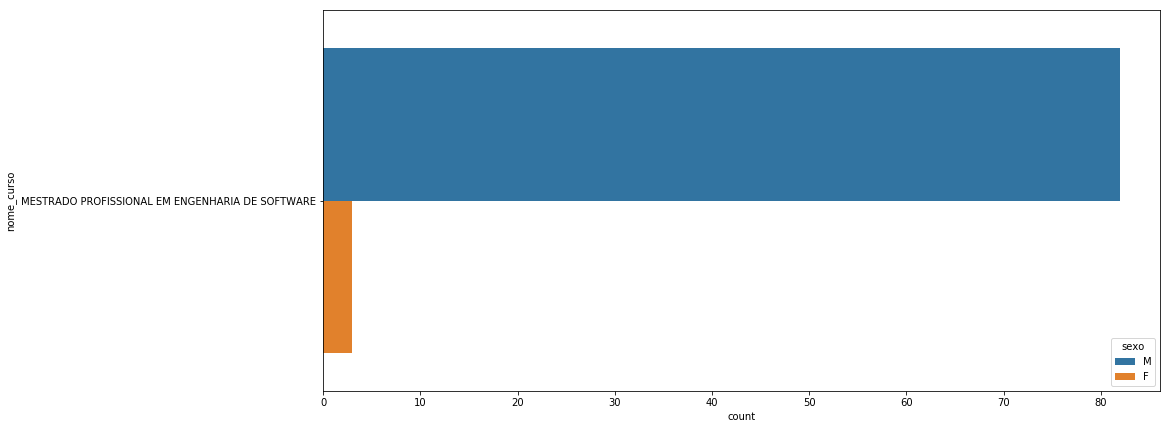

In [193]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=PPgSW, order= PPgSW['nome_curso'].value_counts().iloc[:5].index)

### 2.4.4 PPgITE

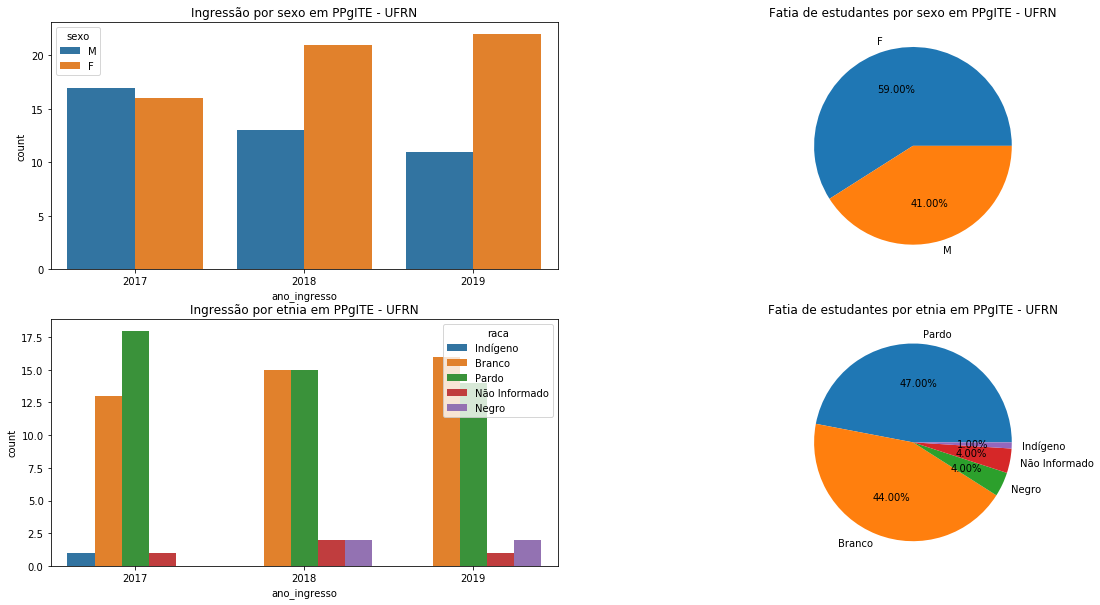

In [194]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=PPgITE).set_title("Ingressão por sexo em PPgITE - UFRN" )
plt.subplot(2,2,2)
PPgITE['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em PPgITE - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=PPgITE).set_title("Ingressão por etnia em PPgITE - UFRN" )
plt.subplot(2,2,4)
PPgITE['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em PPgITE - UFRN")

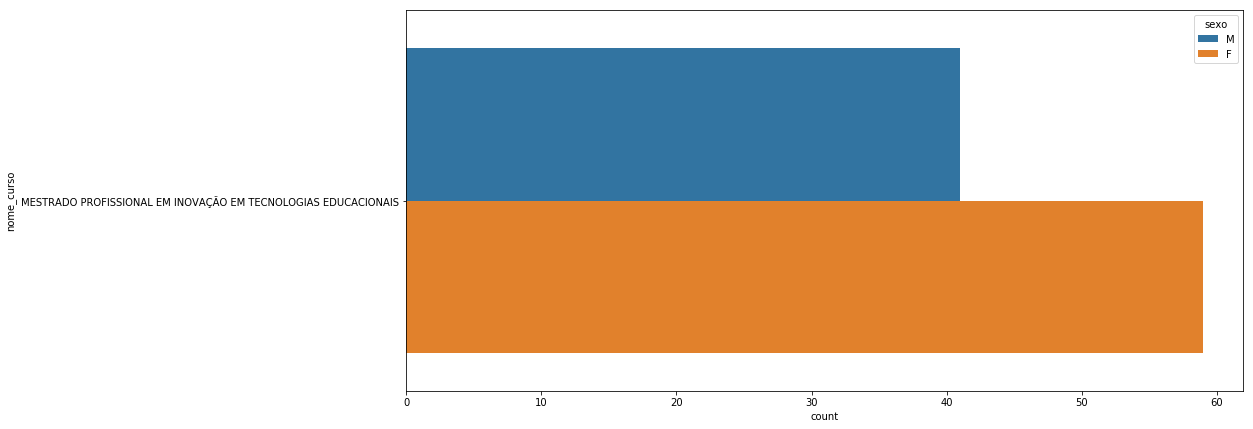

In [195]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=PPgITE, order= PPgITE['nome_curso'].value_counts().iloc[:5].index)

### 2.4.5 PPgBIOINFO

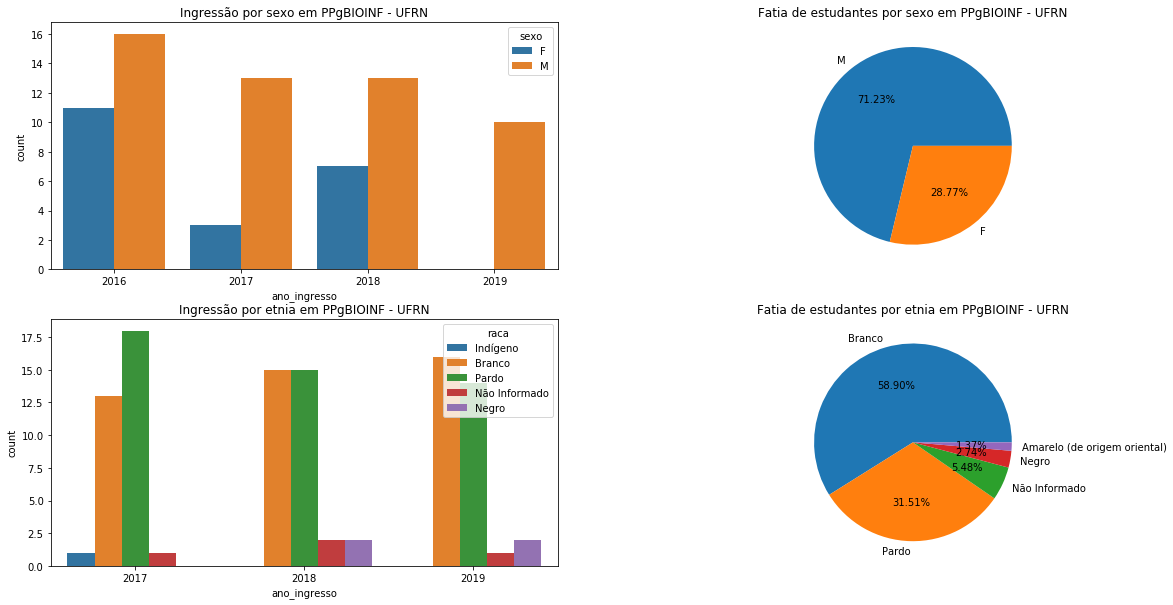

In [197]:
#criando uma nova figura
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x="ano_ingresso", hue='sexo', data=PPgBIOINF).set_title("Ingressão por sexo em PPgBIOINF - UFRN" )
plt.subplot(2,2,2)
PPgBIOINF['sexo'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por sexo em PPgBIOINF - UFRN")


plt.subplot(2,2,3)
sns.countplot(x="ano_ingresso", hue='raca', data=PPgITE).set_title("Ingressão por etnia em PPgBIOINF - UFRN" )
plt.subplot(2,2,4)
PPgBIOINF['raca'].value_counts().plot(kind='pie', label="", autopct="%.2f%%", title="Fatia de estudantes por etnia em PPgBIOINF - UFRN")

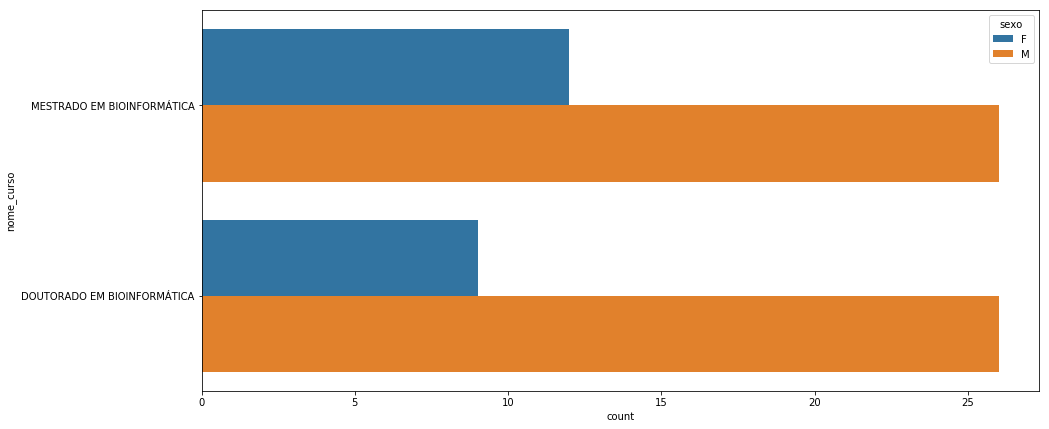

In [196]:
dimensions = (15,7)
plt.subplots(figsize=dimensions)
sns.countplot(y='nome_curso', hue='sexo', data=PPgBIOINF, order= PPgBIOINF['nome_curso'].value_counts().iloc[:5].index)

### 2.4.6 Conclusão sobre os programas de pós graduação

Embora nos cursos de tecnologia, como pudemos verificar durante toda essa análise, a maioria seja masculina, as mulheres dominam mais da metade das vagas dos cursos da Pós Graduação em Tecnologias Educacionais (aproximadamente 60%). A tendência também se repetiu, em maior número, nos cursos do Centro de Educação.

# 3 Conclusão: 

## 3.1 da situação étnica

Após analisar a situação geral da UFRN e verificar padrões e pontos fora da curva em diferentes cursos e setores educacionais, podemos concluir que os pardos e brancos ainda representam a maioria das vagas em análises gerais e minuciosas. Os negros ocupam, em média, 5,5% das vagas totais da UFRN e isso se repete para a maioria dos cursos; talvez pelas cotas. Definitivamente há desigualdade no quesito racial na Universidade.


## 3.2 da situação do gênero

A situação do gênero na UFRN é um pouco mais complicada. Embora as mulheres sejam minoria nos cursos de ciências exatas e tecnologia, elas apresentam maioria nos cursos da área da saúde e educação. A definição brusca e generalizada de Geert Hofstede, utilizada para analisar culturas e nações sobre feminilidade e masculinidade nos diz que sociedades femininas tendem a valorizar os relacionamentos e mostrar sensibilidade e preocupação com o bem estar dos outros e as sociedades masculinas tendem a prevalência de valores como a agressividade, a busca por dinheiro, bens materiais e competitividade parece se concretizar nos dados abertos da UFRN.